# Python and Statistics for Financial Analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [3]:
ms = pd.read_csv("data/microsoft.csv", index_col=0) 
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


## Moving average 

Moving average using rolling for the first 10 days and the first 50 days.

As a general guideline, if the price is above a moving average, the trend is up. If the price is below a moving average, the trend is down. 

The most common time periods used in moving averages are 15, 20, 30, 50, 100, and 200 days. **The shorter the time span used to create the average, the more sensitive it will be to price changes. The longer the time span, the less sensitive the average will be.**

In [4]:
ms["MA10"] = ms['Close'].rolling(10).mean()
ms["MA50"] = ms['Close'].rolling(50).mean()

MA10 - fast signal

MA50 - slow signal

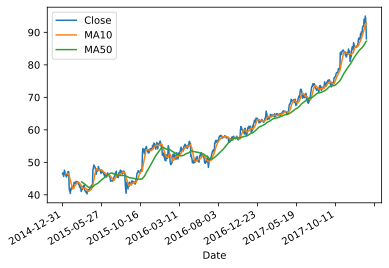

In [5]:
ms['Close'].plot(legend=True)
ms['MA10'].plot(legend=True)
ms['MA50'].plot(legend=True)
plt.gcf().autofmt_xdate()

**Basic Strategy**

If **MA10 > MA50**:

Buy and hold share of stock

Portanto, se indicador de curto prazo for maior que o de longo prazo, há uma sugestão de tendência de alta.

To see if it's long or not:

In [6]:
ms['Shares'] = [1 if ms.loc[ei,'MA10'] > ms.loc[ei, 'MA50']
               else 0 for ei in ms.index]

Perceba que estamos chamando de "ei" o index do DataFrame

**Daily profit**

Primeiro, calcula o preço de fechamento no dia seguinte:

In [7]:
ms['Close1'] = ms['Close'].shift(-1)
ms.iloc[500:505,:]

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1
Date,,,,,,,,,,
2016-12-23,63.450001,63.540001,62.799999,63.240002,61.569557,12398000,63.020000,60.4170,1,63.279999
2016-12-27,63.209999,64.070000,63.209999,63.279999,61.608490,11763200,63.131000,60.5342,1,62.990002
2016-12-28,63.400002,63.400002,62.830002,62.990002,61.326157,14653300,63.132000,60.6496,1,62.900002
2016-12-29,62.860001,63.200001,62.730000,62.900002,61.238541,10181600,63.154001,60.7544,1,62.139999
2016-12-30,62.959999,62.990002,62.029999,62.139999,60.498604,25579900,63.110000,60.8466,1,62.580002


Agora, criamos uma nova variável que irá mostrar o lucro:

In [8]:
ms['Profit'] = [ms.loc[ei,'Close1'] - ms.loc[ei,'Close']
               if ms.loc[ei,'Shares'] == 1
               else 0 for ei in ms.index]



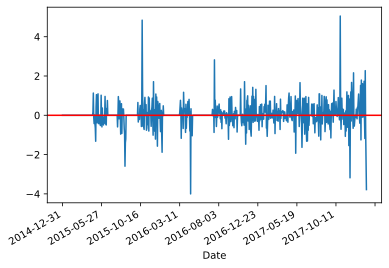

In [9]:
ms['Profit'].plot()
plt.gcf().autofmt_xdate()
plt.axhline(y=0, color='red')

Tudo que estiver abaixo da linha vermelha mostra os momentos em que houve perda de dinheiro. 

Para avaliar os ganhos acumulados:

In [10]:
ms['wealth'] = ms['Profit'].cumsum()
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,91.862,86.5244,1,95.010002,2.270004,30.540009
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.349,86.7606,1,94.260002,-0.750000,29.790009
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,92.765,86.9978,1,91.779999,-2.480003,27.310006
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,92.943,87.1828,1,88.000000,-3.779999,23.530007
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,92.582,87.2684,1,NaN,NaN,NaN


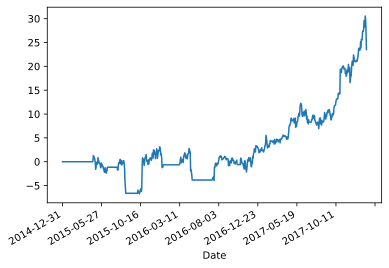

In [11]:
ms['wealth'].plot()
plt.gcf().autofmt_xdate()

## Distribution Model

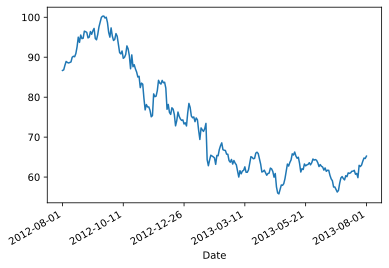

In [12]:
aapl = pd.read_csv("data/apple.csv", index_col=0) 
aapl.loc['2012-08-01':'2013-08-01', 'Close'].plot()
plt.gcf().autofmt_xdate()

Pergunta-se: qual a probabilidade de cair mais de 40\%?

Primeiramente, vamos calcular o logaritmo do retorno diário da ação

<AxesSubplot:>

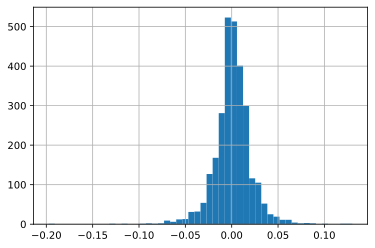

In [13]:
aapl['LogReturn'] = np.log(aapl['Close']).shift(-1) - np.log(aapl['Close'])
aapl['LogReturn'].hist(bins=50)

Percebe-se que o histograma apresenta uma distribuição semelhante à distribuição normal

Vamos calcular a **Função Densidade de Probabilidade** (Probability Density Function) e a **Função de Distribuição Acumulada** (Cumulative Distribution Function)

In [14]:
from scipy.stats import norm

In [15]:
density = pd.DataFrame()
density['x'] = np.arange(-4, 4, 0.001)
density['pdf'] = norm.pdf(density['x'],0,1) # Probability Density Function
density['cdf'] = norm.cdf(density['x'],0,1) # Cumulative Distribution Function

Os valores -4 e 4 são para simplificar;

0 e 1 são parâmetros de média e desvio padrão

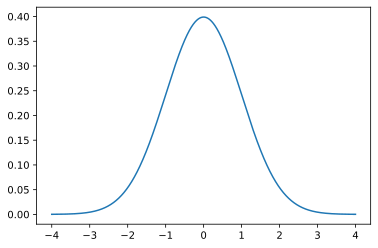

In [16]:
plt.plot(density['x'], density['pdf'])

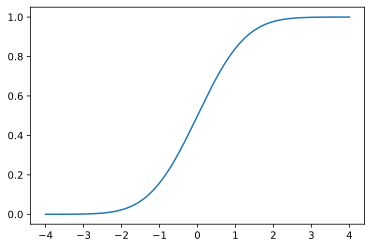

In [17]:
plt.plot(density['x'], density['cdf'])

Para calcular os valores aproximados da média e da variância do log do retorno diário da ação:

In [18]:
mu = aapl['LogReturn'].mean()
sigma = aapl['LogReturn'].std()
print(mu, sigma)

0.000975467759150088 0.020045447615854962


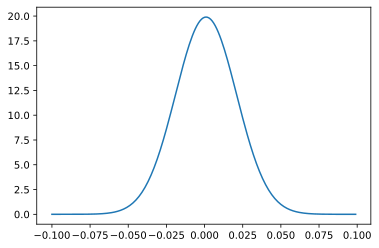

In [19]:
denAapl = pd.DataFrame()
denAapl['x'] = np.arange(-0.1, 0.1, 0.001)
denAapl['pdf'] = norm.pdf(denAapl['x'], mu, sigma)
plt.plot(denAapl['x'], denAapl['pdf'])

Qual a chance de perder mais de 5\% em um dia?

The probability of having a daily return worse than -5% is 0.005495344250959507


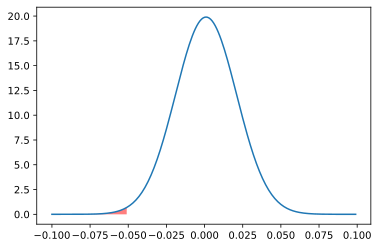

In [20]:
plt.plot(denAapl['x'], denAapl['pdf'])
plt.fill_between(x= denAapl['x'],
                y2=0,
                y1=denAapl['pdf'], 
                where = denAapl['x'] <= -0.05,
                facecolor='red',
                alpha=0.5)

prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The probability of having a daily return worse than -5% is ' + str(prob_return1))

E qual a probabilidade do preço da ação cair mais de 40\% em um ano (220 dias)? 

Vamos modelar o retorno anual a partir de uma distribuição normal. Para isso, precisamos descobrir a média e o desvio padrão do retorno anual. Assumiremos que os retornos diários são independentes, de modo a simplificar a análise. Esta simplificação é distante da realidade. 

In [21]:
mu220 = 220 * mu
print(mu220)
sigma220 = (220**0.5)*sigma
print(sigma220)
sigma220 = 220**0.5 * sigma
print('A probabilidade do preço da ação cair mais de 40% em 220 dias é ', norm.cdf(-0.4, mu220, sigma220))

0.21460290701301937
0.29732203656371786
A probabilidade do preço da ação cair mais de 40% em 220 dias é  0.019361015454142632


## Value at Risk (VaR)
Mede a perda de um investimento.

Por exemplo, o valor do quantil 5% é:

In [22]:
norm.ppf(0.05, mu, sigma)

-0.031996359455654697

Isso é o mesmo que Value at Risk ao nível de 95\%.

Este número significa que há uma probabilidade de 5\% de que o retorno diário da ação é pior do que -3%

Two famous professors in the field asset pricing, Fama and French responds in this way. Distribution of a daily and monthly stock return, are rather symmetric about their means, but the tails are fatter. Which means there are more outliers that would be expected with normal distributions. It means that, if tail returns negative, as well as positive, may occur more often than we expect. If we use normal distribution, this is debatable, at least for the returns of some assets with different time window size. To modal a fat tail, people proposed modal return using t-distributions with low degree of freedom.

## Intervalo de Confiança

Caso a amostra for uma boa representação da população, a média da população será próxima à media da amostra. 
Vamos estimar a média da população usando um teto e um piso para um intervalo de confiança.
Partimos do log do retorno da Apple, já calculado:

<AxesSubplot:>

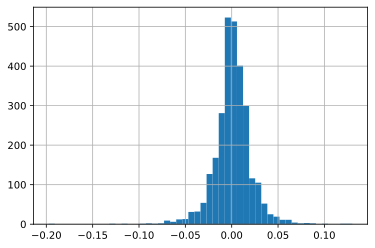

In [23]:
aapl['LogReturn'].hist(bins=50)

Para começar, é preciso estandardizar a média da população. Assim, de modo a estandardizar uma variável normal:

$$ \frac{\bar{X} - \mu}{\frac{\sigma}{{n}}}$$

Por ser uma normal, segue a distribuição Z. Neste tipo de distribuição, por ser centralizada no zero, a magnitude destes quantis será a mesma. Como vamos calcular o intervalo de confiança de 80%, cada $\alpha$ será de 0.1 (10% em cada lado).

In [24]:
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)
sample_mean = aapl['LogReturn'].mean()
sample_std = aapl['LogReturn'].std(ddof=1)/(aapl.shape[0])**0.5

interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std
print("Sample Mean is ", sample_mean)
print("80% confidence interval is:")
print(interval_left, interval_right)

Sample Mean is  0.000975467759150088
80% confidence interval is:
0.0004927367254936755 0.0014581987928065005


Com um intervalo de confiança de 80%, o retorno da ação será positivo.

## Teste de Hipótese
O objetivo é de validar uma afirmação com base em um teste de hipótese.
A partir do preço de fechamento das ações da Apple entre 2007 e 2018:

In [28]:
plt.plot(aapl.loc[:,'Close'])

As hipóteses:

In [26]:
xbar = aapl['LogReturn'].mean()
s = aapl['LogReturn'].std(ddof=1)
n = aapl['LogReturn'].shape[0]
zhat = (xbar-0)/ (s/(n**0.5))
print(zhat)

2.5896661841029576


Vamos determinar um critério de decisão

In [27]:
alpha = 0.05
zleft = norm.ppf(alpha/2,0,1)
zright = -zleft
print(zleft, zright)
print('A um nível de significância de ', alpha)
print('Devemos rejeitar? ', zhat>zright or zhat<zleft)

-1.9599639845400545 1.9599639845400545
A um nível de significância de  0.05
Devemos rejeitar?  True
